In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, make_moons
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [3]:
iris = load_iris(as_frame=True)
display(iris.data.head())
iris.target.value_counts()
display(iris.data.shape)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


(150, 4)

In [4]:
X = iris.data[['petal length (cm)', 'petal width (cm)']]
y = iris.target == 2  # virginica

svm_clf = make_pipeline(
    StandardScaler(),
    LinearSVC(C=1, random_state=42)
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

svm_clf.fit(X, y)
pd.concat([
    pd.Series(svm_clf.predict(X_test)),
    y_test.reset_index(drop=True),
    pd.Series(svm_clf.decision_function(X_test)) # Distance to the decision boundary
], axis=1)


,0,target,1
0,False,False,-1.154062
1,False,False,-5.771857
2,True,True,3.221109
3,False,False,-0.652906
4,False,False,-0.618103
5,False,False,-5.720150
6,False,False,-1.880938
7,True,True,1.663944
8,False,False,-0.652906
9,False,False,-1.846135


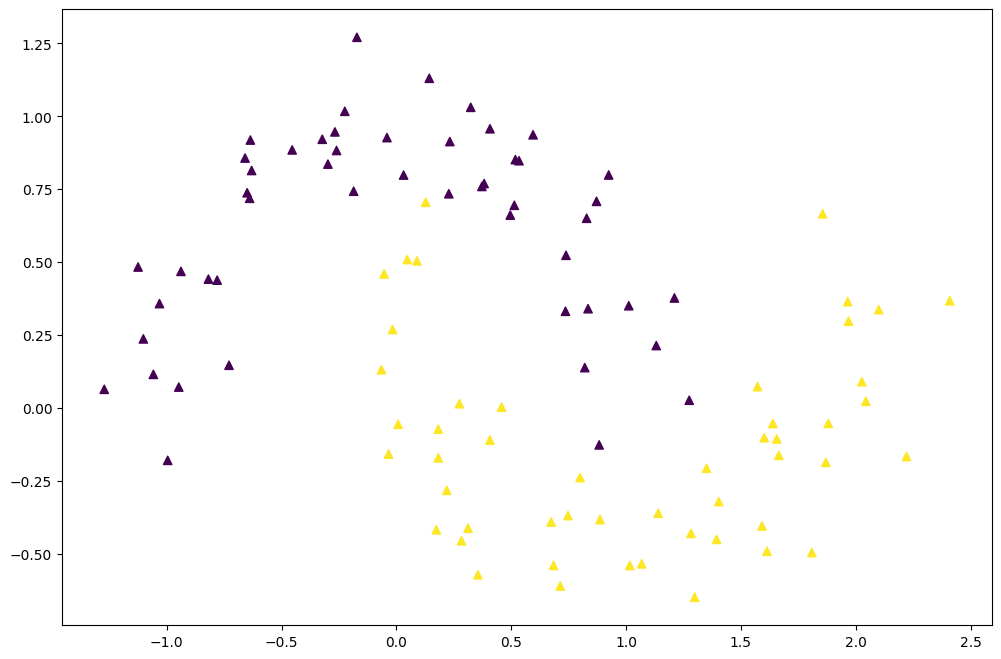

In [5]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(X[:, 0], X[:, 1], c=y, marker='^')
display()

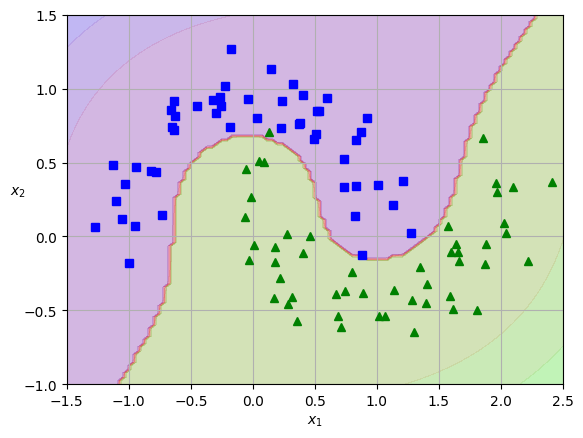

In [30]:
polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10_000, random_state=42)
)
polynomial_svm_clf.fit(X, y)


def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])